In [7]:
# Import Libralies
import os
import random as rn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import math
#%matplotlib inline
plt.style.use('seaborn-whitegrid')

print(tf.__version__)

2.5.0


In [9]:
#Data Loading
folder_path=r"/content/drive/MyDrive/Colab Notebooks/CGH/AID/Step2_Enthalpy Calculation/Output"

all_files = os.listdir(folder_path)
print(all_files)

list = []

for file_name in all_files:
    if file_name=="SpecPower_enthpy_based.csv":
        df_each = pd.read_csv(folder_path+"/"+file_name)
        list.append(df_each)

df = pd.concat(list, axis=0, ignore_index=True)
#df.head(50)

['SpecPower_enthpy_based.csv', 'SpecPower_enthpy_based_Indexed.csv']


In [10]:
df=df.dropna()
df.columns.values

array(['Date', 'FEED_N2', 'FEED_C1', 'FEED_C2', 'FEED_C3', 'FEED_iC4',
       'FEED_nC4', 'FEED_C5+', 'MCHE_P_IN', 'FEED_MCHE_IN',
       'FEED_MCHE_WB_OUT', 'FEED_MCHE_WB_OUT_2', 'MCHE_OUT_P', 'MCHE_OUT',
       'LNG_Rundown', 'LNG_Rundown_Mol', 'LNG_Rundown_2', 'LNG_Dens',
       'LNG_Loading', 'AmbTemp_1', 'AmbTemp_2', 'AmbTemp_5', 'AirTemp_A',
       'AirTemp_B', 'AirTemp_C', 'AirTemp_D', 'AirTemp_E', 'P_HPMR',
       'COLD_JT', 'WARM_JT', 'MRV_F', 'MRL_F', 'MR_N2', 'MR_C1', 'MR_C2',
       'MR_C3', 'MR_C4', 'MRV_MCHE_IN_T', 'MRL_MCHE_IN_T',
       'MRL_MCHE_WB_OUT_T', 'MRL_MCHE_WB_OUT_P', 'MRL_MCHE_WB_IN_T',
       'MRV_MCHE_CB_OUT', 'MRV_MCHE_WB_OUT_P', 'MRV_MCHE_CB_OUT_P',
       'MRV_MCHE_CB_IN', 'MR_Return_T', 'MR_Return_P', 'LPMR_Suc_P',
       'LPMR_Suc_T', 'LPMR_Dis_P', 'LPMR_Dis_T', 'HPMR_Suc_P',
       'HPMR_Suc_T', 'HPMR_Dis_P', 'HPMR_Dis_T', 'MR_FLOW', 'C3_GT_Speed',
       'LPMR_GT_Speed', 'HPMR_GT_Speed', 'FFF_Flow',
       'Fuel_Flow_C3_Driver', 'Fuel_Flow_LPMR_Drive

In [23]:
df['Date']

0        2018-08-04 09:00:00
1        2018-08-04 10:00:00
2        2018-08-04 11:00:00
3        2018-08-04 12:00:00
4        2018-08-04 13:00:00
                ...         
12657    2020-09-17 00:00:00
12658    2020-09-17 01:00:00
12659    2020-09-17 02:00:00
12660    2020-09-17 03:00:00
12661    2020-09-17 04:00:00
Name: Date, Length: 12659, dtype: object

**Data Cleansing**

In [12]:
option=2

if option==1:
    df=df[df['FEED_N2']>0.6]
    df=df[df['FEED_C1']>60]
    df=df[df['FEED_C2']>3]
    df=df[df['FEED_C3']>1.25]
    df=df[df['MR_N2']>5]
    df=df[df['MR_C1']>30]
    df=df[df['MR_C2']>30]
    df=df[df['MR_C3']>8]
elif option==2:
    df=df[df['FEED_N2']>0]
    df=df[df['FEED_C1']>0]
    df=df[df['FEED_C2']>0]
    df=df[df['FEED_C3']>0]
    df=df[df['MR_N2']>0]
    df=df[df['MR_C1']>0]
    df=df[df['MR_C2']>0]
    df=df[df['MR_C3']>0]
    
#df.describe()

In [18]:
# Load AI model
model = load_model('/content/drive/MyDrive/Colab Notebooks/CGH/AID/Step4_SensitivityCheck/Input/Model_0.571.h5')

# Load Scaler used for Model
import pickle
sc_X = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/CGH/AID/Step4_SensitivityCheck/Input/Model_r2_0.571_input.pkl", "rb"))
sc_y= pickle.load(open("/content/drive/MyDrive/Colab Notebooks/CGH/AID/Step4_SensitivityCheck/Input/Model_r2_0.571_output.pkl","rb"))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Case 1

In [19]:
def case1_ana(df_study,list_X):
    for i,index in enumerate(list_X):
    #Seaborn Style 
        print("{} Raw Data — {} correlation check".format(i+1,index))
        plt.figure(figsize=(8,4))
        fig = plt.figure()
        kind='reg' #“scatter” | “kde” | “hist” | “hex” | “reg” | “resid”
        g=sns.jointplot(data=df_study, x=index, y="SpecPower_Enthalpy", kind=kind)
        g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=10)
        plt.show()
      #  sns.heatmap(df)
    #     fig.savefig('{}.png.format(index)')


Case 2

In [20]:
def case2_ana(df_study,list_X):
    # Case 2: Sensitivity Check of Each Parameters using Created Model
    # In this case, only each parameter is changed while the others are average value.
   
    #Each Parameter Average Value filling
    df_ave = df_study.copy()
    for index in list_X:
        df_ave[index] = df_ave[index].mean()
    
    for i,index in enumerate(list_X):
        df_init_study = df_ave.copy() # copy from average data frame
        input_df= df_init_study[list_X].copy()
       #input_df=input_df.round({'060TI4002.PV':1,'051PI1251.PV':0})
        #input_df=input_df.round(2)
        #input_df=input_df.groupby(index).mean().reset_index()
        input_df[index]=df_study[index]# replace one of the input parameter into original values
        # Standadization of Input Data → Regression by Model → Inverse of Standadization
        X = input_df.values
        X_std = sc_X.transform(X)
        # X_std.mean(axis=0)
        Spec_Power_scaled = model.predict(X_std)
        Spec_Power = sc_y.inverse_transform(Spec_Power_scaled)

        # Integration of DataFlame
        df_temp = pd.DataFrame(data = Spec_Power, columns=["SpecPower_Enthalpy"])
        df_add = pd.concat([input_df.reset_index(), df_temp], axis=1)
        print("{} Case 2: Sensitivity Check of {}".format(i+1,index))
        # Draw Figures
        plt.figure(figsize=(12,4))
        fig = plt.figure()
        #Seaborn style
        kind='reg' #“scatter” | “kde” | “hist” | “hex” | “reg” | “resid”
        g=sns.jointplot(data=df_add, x=index, y="SpecPower_Enthalpy", kind=kind)
        g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=10)
        plt.show()
    #     fig.savefig('{}.png.format(index)')

Case 3

In [21]:
def case3_ana(df_study,list_X,list_MR):
    # In this case, MR Compositions are changed while the others are average value.

    #Each Parameter Average Value filling
    df_ave = df_study.copy()
    for i,index in enumerate(list_X):
        df_ave[index] = df_ave[index].mean()
    # Create List of MR Compositions
   

    df_init_MR = df_ave.copy() # copy from average data flame
    for index in list_MR:
        df_init_MR[index] = df_study[index] # replace MR parameters (MR Values became origiral values)

    input_df = df_init_MR[list_X].copy()
    input_df.reset_index()

    # Standadization of Input Data → Regression by Model → Inverse of Standadization
    X = input_df.values
    X_std = sc_X.transform(X)
    X_std.mean(axis=0)
    Spec_Power_scaled = model.predict(X_std)
    Spec_Power = sc_y.inverse_transform(Spec_Power_scaled)

    # Integration of DataFlame
    df_temp = pd.DataFrame(data = Spec_Power, columns=["SpecPower_Enthalpy"])
    df_add = pd.concat([input_df.reset_index(), df_temp], axis=1)
        # df_add.set_index('index', inplace=True)
        # df_add.index.name = ''
    #print(df_add)
    # Draw Figures
    for index in list_MR:
        print("{} Cases: Sensitivity Check of {}".format(i+1,index))
        plt.figure(figsize=(12,4))
        fig = plt.figure()
        
    #Seaborn Style
        kind='reg' #“scatter” | “kde” | “hist” | “hex” | “reg” | “resid”
        g=sns.jointplot(data=df_add, x=index, y="SpecPower_Enthalpy", kind=kind)
        g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=10)
        plt.show()
    #     fig.savefig('{}.png.format(index)')

Data Range Selection and Running for different Cases

1 Raw Data — FEED_N2 correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

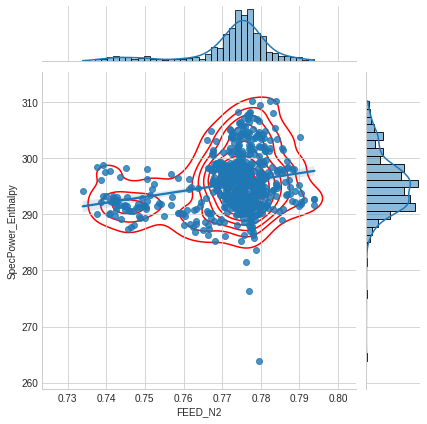

2 Raw Data — FEED_C1 correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

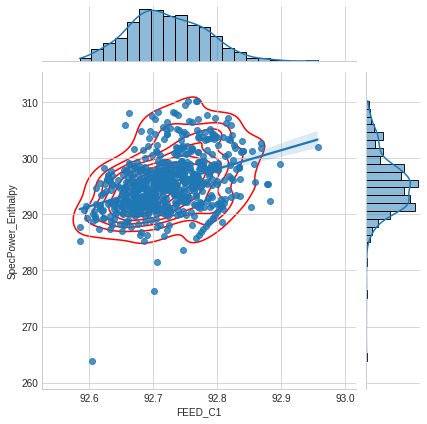

3 Raw Data — FEED_C2 correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

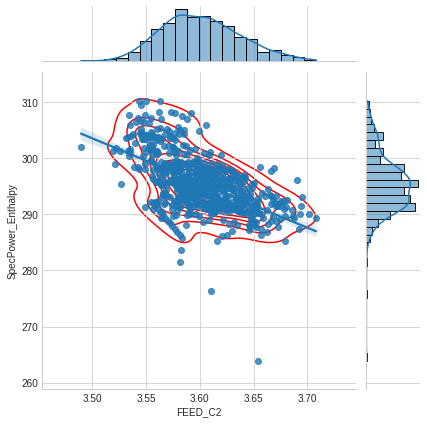

4 Raw Data — FEED_C3 correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

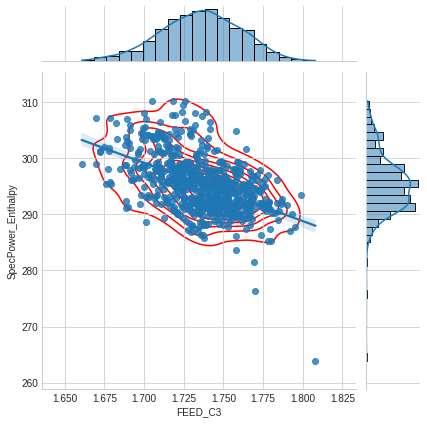

5 Raw Data — MCHE_P_IN correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

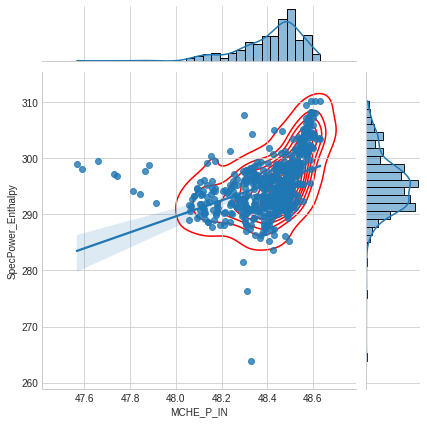

6 Raw Data — MCHE_OUT correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

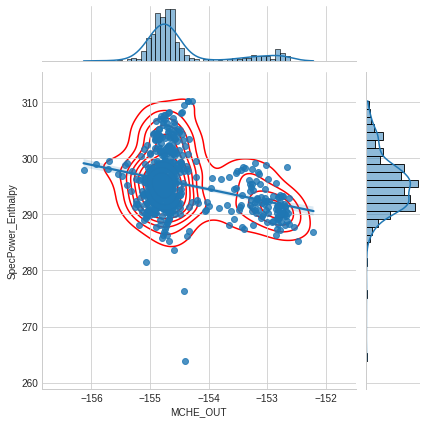

7 Raw Data — AmbTemp_2 correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

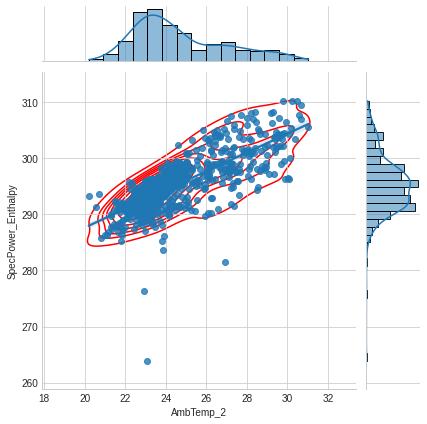

8 Raw Data — P_HPMR correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

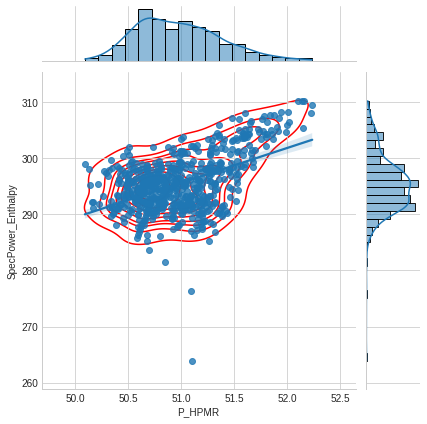

9 Raw Data — MR_N2 correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

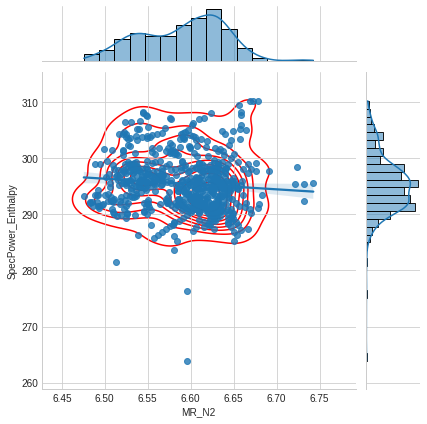

10 Raw Data — MR_C1 correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

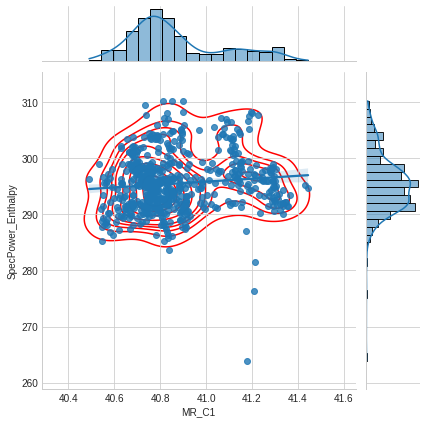

11 Raw Data — MR_C2 correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

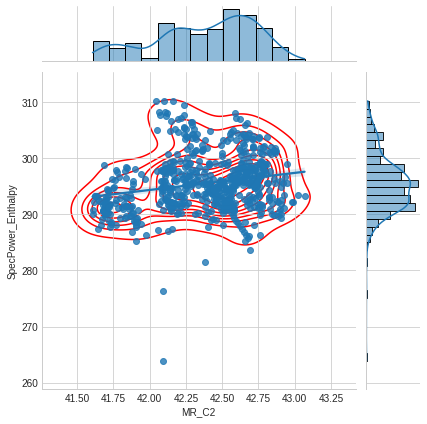

12 Raw Data — MR_C3 correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

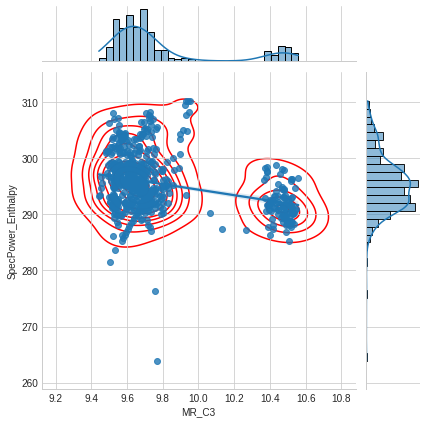

13 Raw Data — MR_C4 correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

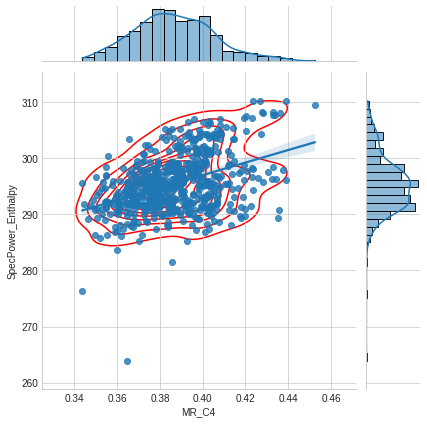

14 Raw Data — MR_Return_P correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

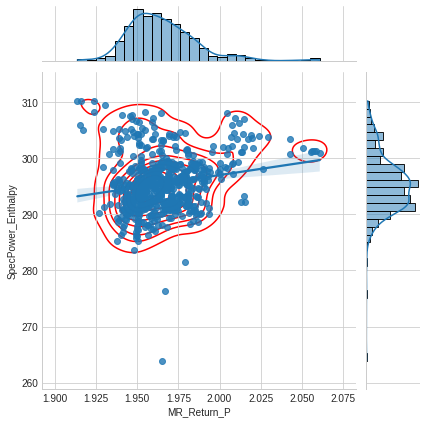

15 Raw Data — MCHE_BTM_DT correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

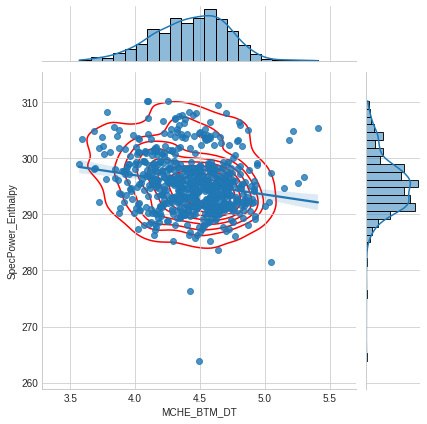

16 Raw Data — LPMR_Suc_P correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

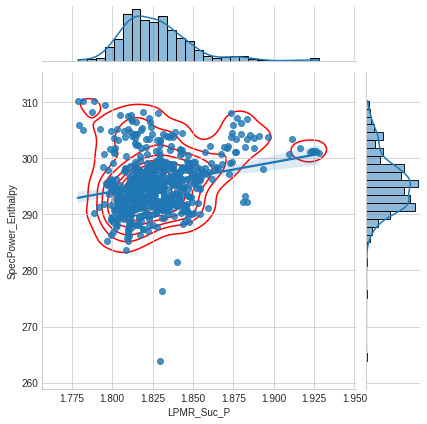

17 Raw Data — C3_CON_OUT correlation check


<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

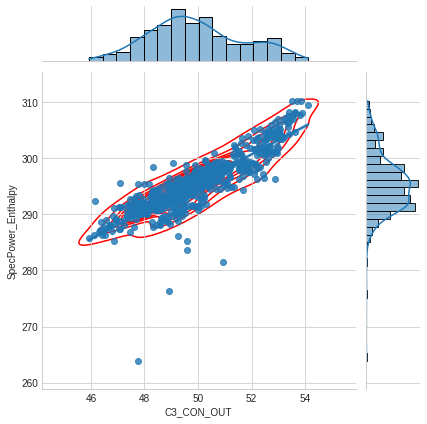

In [25]:
cname=str(df.columns.tolist()[0])
df=df.rename(columns={cname:'Date'})
df['Date_List']=[each.split('-') for each in df['Date']]
df["Year"]=[each[0] for each in df['Date_List']]
df["Month"]=[each[1] for each in df['Date_List']]

unique_year_month=[]
for each_y,each_m in zip(df["Year"],df["Month"]):
    if (each_y,each_m) not in unique_year_month:
        unique_year_month.append((each_y,each_m))

#usr_batch=int(input("How many months to be considerd for each analysis "))
#usr_total=int(input("How many months do you want to analyse?"))        

# try:
#       if unique_year_month[usr_total-1]:
#             total_period_analy=unique_year_month[-usr_total:]
# except:
#       print("We don't have such amount of months!")
#print(unique_year_month)
usr_batch=1
total_period_analy=[('2019','07')] #,('2019','11'),('2019','12')

counter=0
df_study=pd.DataFrame()
for y,m in total_period_analy:
    if counter==usr_batch:
        counter=0
        df_study=pd.DataFrame()
    if counter<usr_batch:
        df_study2=df[df['Month']==m]
        df_study2=df_study2[df_study2['Year']==y]
        df_study=pd.concat([df_study,df_study2])
        counter+=1
        


#     #Standardization for inputs
#     X = df_study.loc[:, list_X].values
#     y = df_study.loc[:, list_y].values
#     print(df_study.info())
#     X_std = sc_X.transform(X)
#     y_std = sc_y.transform(y)

#     #sc_X.fit(X=X)
#     #sc_y.fit(X=y)
#     X_std.mean(axis=0), y_std.mean(axis=0)
    
    list_MR1 = [
    #     'FEED_N2_mol%', 
    #     'FEED_C1_mol%',
    #     'FEED_C2_mol%',
    #     'FEED_C3_mol%', 
        'MR_N2',
        'MR_C1',
        'MR_C2',
        'MR_C3',
    #     'FEED_MassFlow' 
    #     'FEED_MCHE_In_P',
    #     'FEED_MCHE_In_T',
    #     'MR_MassFlow',
    #     'MR_MCHE_In_P',
    #     'MR_MCHE_In_T',
    #     'MCHE_WB_Out_T',
    #     'MCHE_CB_Out_T',
    #     'FEED_WB_Out_P',
    #     'LMR_WB_Out_P',
    #     'HMR_WB_Out_P',
    #     'FEED_CB_Out_P',
    #     'LMR_CB_Out_P',
    #     'MR_WB_SS_In_P',
    #     'MR_CB_SS_In_P',
    #     'MR_MCHE_Out_P',
    ]
        
    list_MR2 = [
        'AmbTemp_2',
        'C3_CON_OUT'
    ]
        
    list_MR3= [
    'P_HPMR',
    'LPMR_Suc_P'
    ]

    # explanatory variables
    list_X = [
    'FEED_N2',
    'FEED_C1',
    'FEED_C2',
    'FEED_C3',
    'MCHE_P_IN',
    'MCHE_OUT',
    'AmbTemp_2',
    'P_HPMR',
    'MR_N2',
    'MR_C1',
    'MR_C2',
    'MR_C3',
    'MR_C4',
    'MR_Return_P',    
    'MCHE_BTM_DT', 
    'LPMR_Suc_P',
    'C3_CON_OUT'  #17
    ]

    # target variable
    list_y = [
        'SpecPower_Enthalpy' 
    ]

    case1_ana(df_study,list_X)

1 Case 2: Sensitivity Check of FEED_N2


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

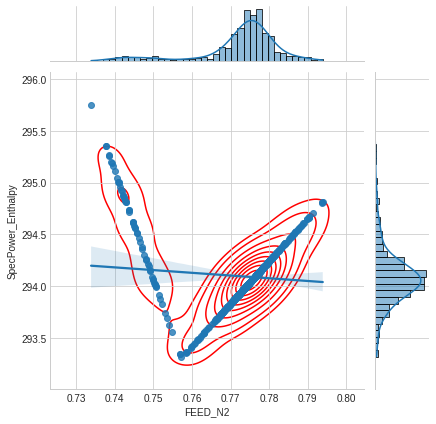

2 Case 2: Sensitivity Check of FEED_C1


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

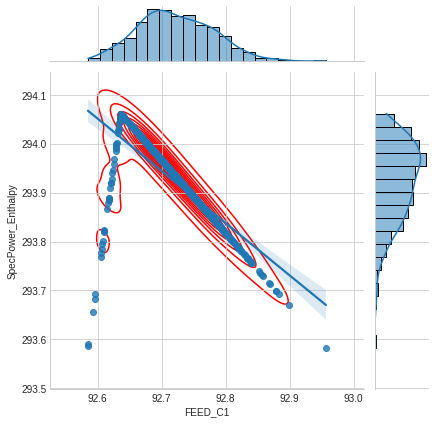

3 Case 2: Sensitivity Check of FEED_C2


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

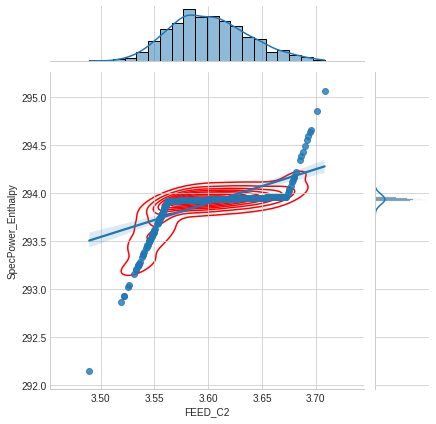

4 Case 2: Sensitivity Check of FEED_C3


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

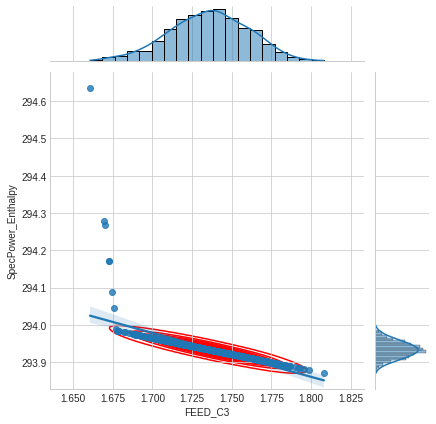

5 Case 2: Sensitivity Check of MCHE_P_IN


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

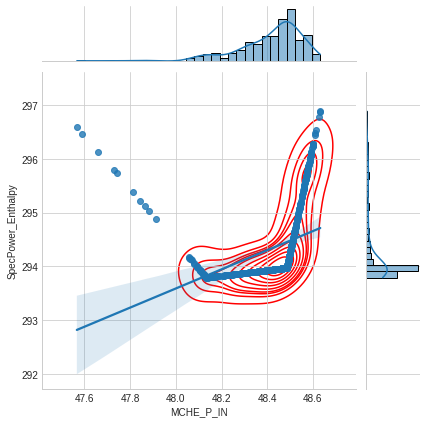

6 Case 2: Sensitivity Check of MCHE_OUT


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

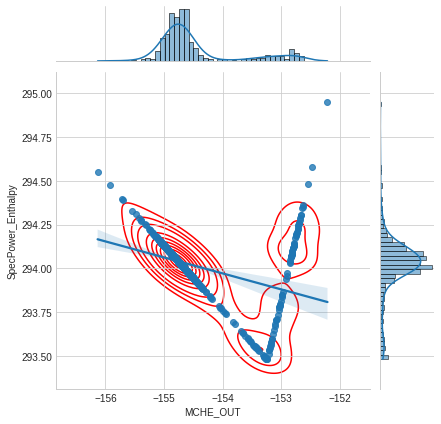

7 Case 2: Sensitivity Check of AmbTemp_2


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

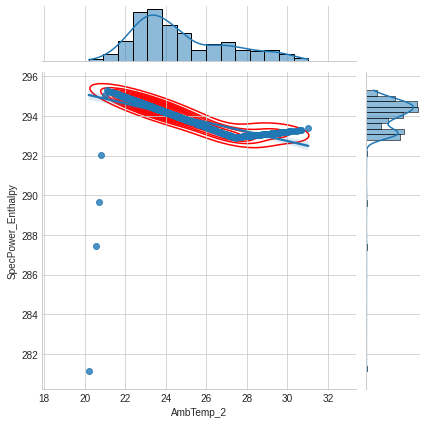

8 Case 2: Sensitivity Check of P_HPMR


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

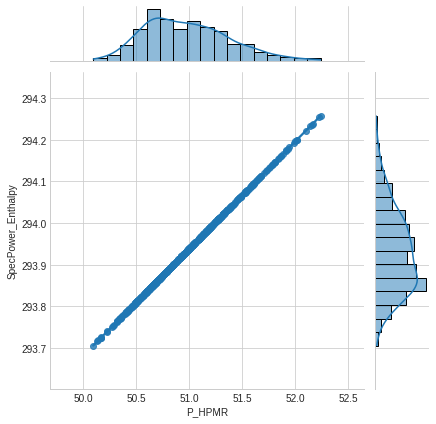

9 Case 2: Sensitivity Check of MR_N2


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

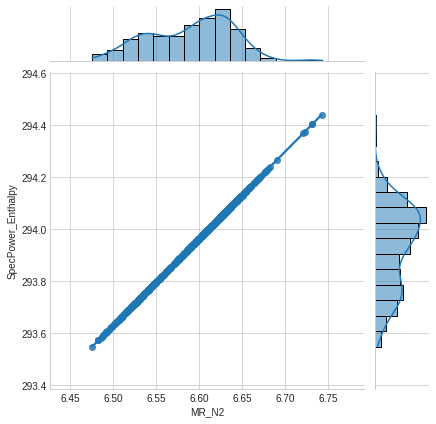

10 Case 2: Sensitivity Check of MR_C1


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

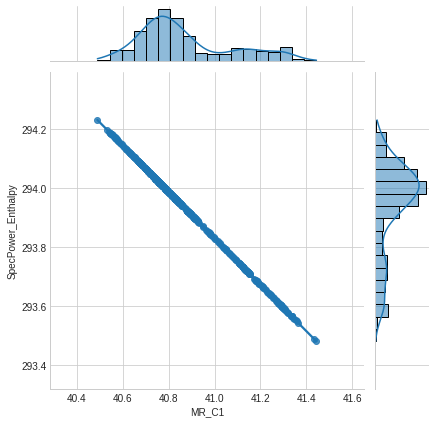

11 Case 2: Sensitivity Check of MR_C2


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

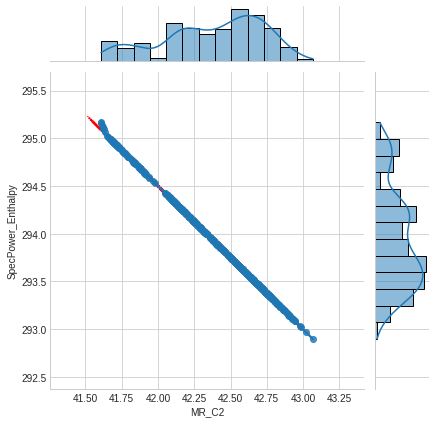

12 Case 2: Sensitivity Check of MR_C3


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

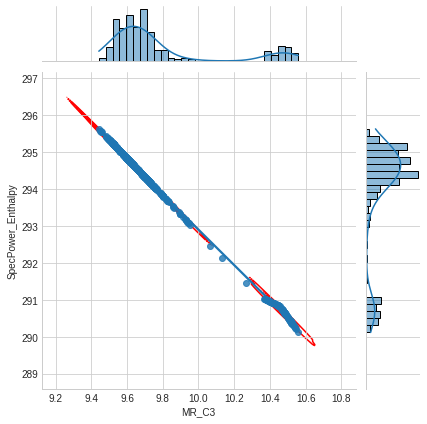

13 Case 2: Sensitivity Check of MR_C4


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

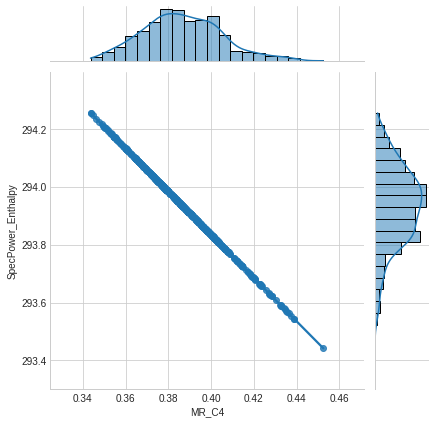

14 Case 2: Sensitivity Check of MR_Return_P


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

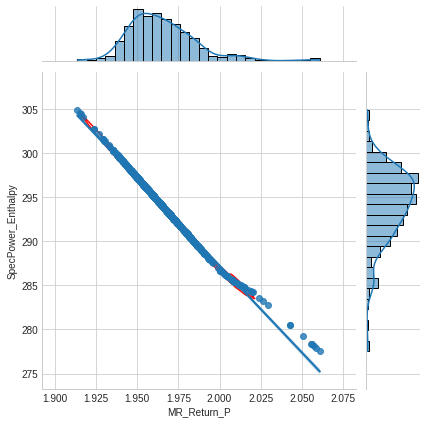

15 Case 2: Sensitivity Check of MCHE_BTM_DT


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

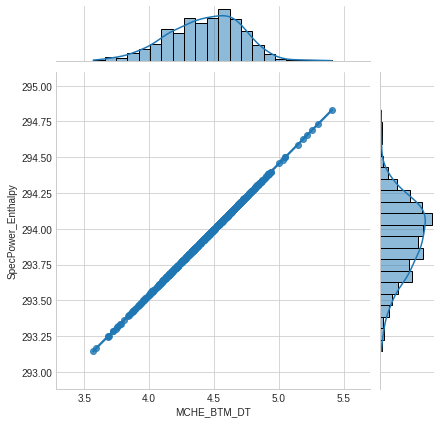

16 Case 2: Sensitivity Check of LPMR_Suc_P


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

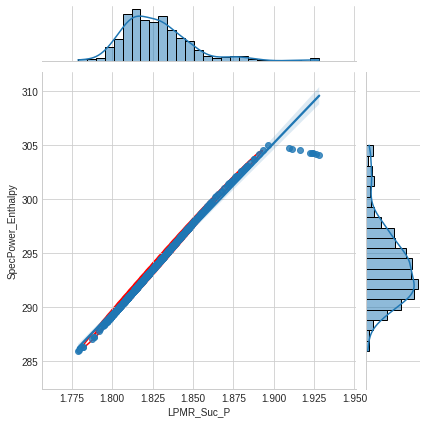

17 Case 2: Sensitivity Check of C3_CON_OUT


<Figure size 864x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

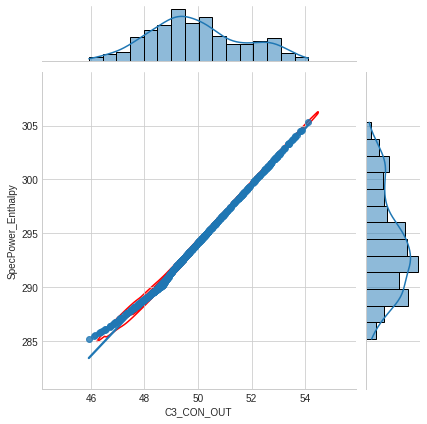